In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Analyse globale 2015-2025
# Téléchargement des données 2015-2025

tickers = ["MC.PA", "^FCHI"]

data = yf.download(tickers, start="2015-01-01")
data = data["Close"].dropna()

returns = data.pct_change().dropna()

returns.columns = ["LVMH", "CAC 40"]

returns

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  2 of 2 completed


,LVMH,CAC 40
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015041,-0.019041
...,...,...
2026-02-13,-0.019638,-0.003455
2026-02-16,0.007974,0.000573
2026-02-17,0.018136,0.005406


In [4]:
# Calcul des rendements journaliers

returns = data.pct_change().dropna()

returns.head()

Ticker,MC.PA,^FCHI
Date,,
2015-01-05,-0.029041,-0.033142
2015-01-06,-0.011413,-0.006776
2015-01-07,0.000796,0.007158
2015-01-08,0.031424,0.035855
2015-01-09,-0.015041,-0.019041


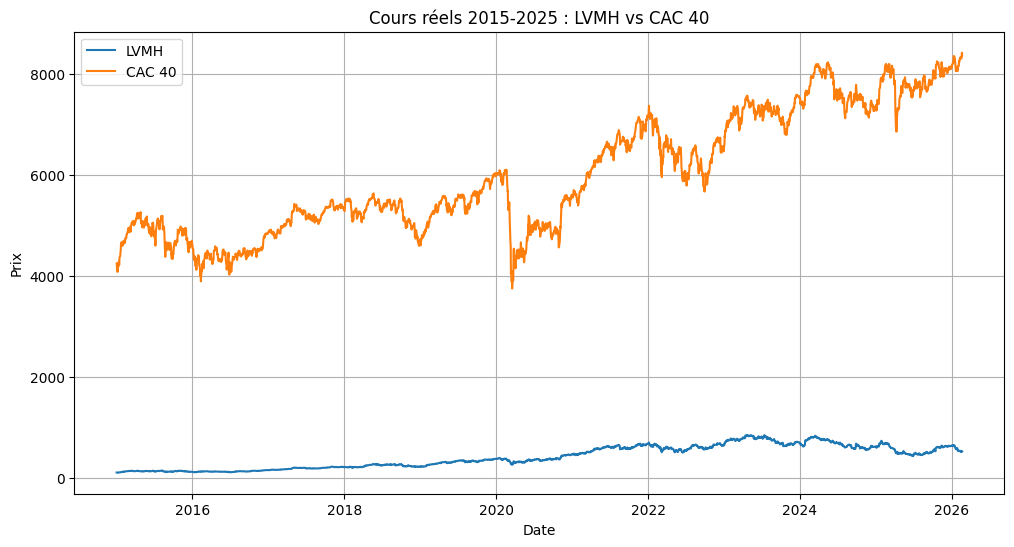

In [5]:
# Cours LVMH & CAC40

plt.figure(figsize=(12,6))

plt.plot(data.index, data['MC.PA'], label='LVMH')
plt.plot(data.index, data['^FCHI'], label='CAC 40')

plt.title("Cours réels 2015-2025 : LVMH vs CAC 40")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)

plt.show()

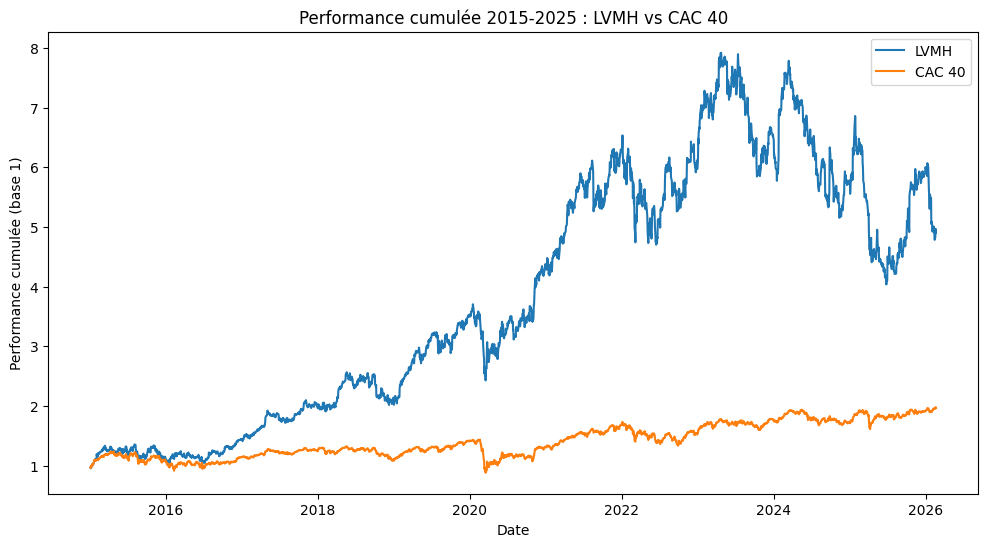

In [6]:
# Performance Cumulée 
rendements = data.pct_change().dropna()
performance_cumulee = (1 + rendements).cumprod()
performance_cumulee.columns = ['LVMH', 'CAC40']
plt.figure(figsize=(12,6))

plt.plot(performance_cumulee.index, performance_cumulee['LVMH'], label='LVMH')
plt.plot(performance_cumulee.index, performance_cumulee['CAC40'], label='CAC 40')

plt.title("Performance cumulée 2015-2025 : LVMH vs CAC 40")
plt.xlabel("Date")
plt.ylabel("Performance cumulée (base 1)")
plt.legend()
plt.show()

In [7]:
# Rendements annualisés
annual_return = returns.mean() * 252

annual_return_table = pd.DataFrame({
    "Rendement annualisé (%)": annual_return * 100
})
print("Tableau comparatif du rendement annualisé :")
annual_return_table.index = ["LVMH", "CAC 40"]
annual_return_table.round(2)

Tableau comparatif du rendement annualisé :


,Rendement annualisé (%)
LVMH,18.04
CAC 40,7.70


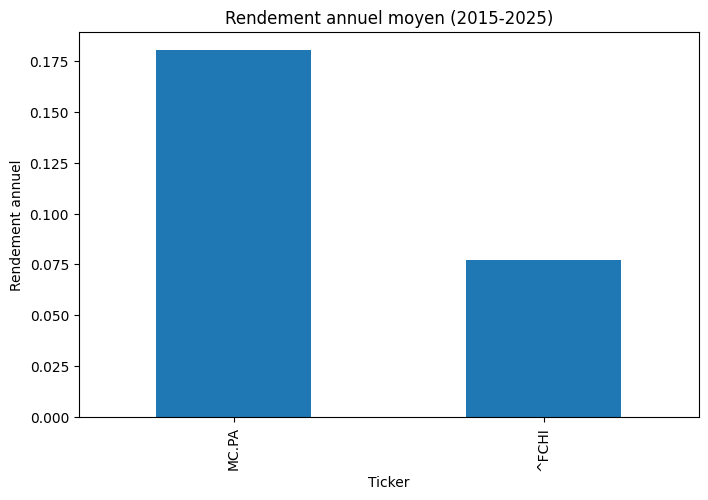

In [8]:
import matplotlib.pyplot as plt

mean_returns = returns.mean() * 252  # annualisé

plt.figure(figsize=(8,5))
mean_returns.plot(kind='bar')
plt.title("Rendement annuel moyen (2015-2025)")
plt.ylabel("Rendement annuel")
plt.show()

In [9]:
# Volatilité annualisé

volatility = returns.std() * np.sqrt(252)

volatility_table = pd.DataFrame({
    "Volatilité annualisée (%)": volatility * 100
})
print("Tableau comparatif de la volatilité annualisé :")
volatility_table.index = ["LVMH", "CAC 40"]
volatility_table.round(2)

Tableau comparatif de la volatilité annualisé :


,Volatilité annualisée (%)
LVMH,28.23
CAC 40,18.38


In [10]:
# Ratio de Sharpe

risk_free_rate = 0.02

sharpe = (annual_return - risk_free_rate) / volatility

sharpe_table = pd.DataFrame({
    "Ratio de Sharpe": sharpe
})

sharpe_table.index = ["LVMH", "CAC 40"]
sharpe_table.round(2)

,Ratio de Sharpe
LVMH,0.57
CAC 40,0.31


In [11]:
# Max Drawdown
def max_drawdown(r):
    cumulative = (1 + r).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_dd = returns.apply(max_drawdown)

drawdown_table = pd.DataFrame({
    "Max Drawdown (%)": max_dd * 100
})

drawdown_table.index = ["LVMH", "CAC 40"]
drawdown_table.round(2)

,Max Drawdown (%)
LVMH,-49.03
CAC 40,-38.56


In [12]:
# Tableau comparatif global

summary_table = pd.DataFrame({
    "Rendement annualisé (%)": annual_return * 100,
    "Volatilité annualisée (%)": volatility * 100,
    "Ratio de Sharpe": sharpe,
    "Max Drawdown (%)": max_dd * 100
})
print("Tableau comparatif global :")
summary_table.index = ["LVMH", "CAC 40"]
summary_table.round(2)

Tableau comparatif global :


,Rendement annualisé (%),Volatilité annualisée (%),Ratio de Sharpe,Max Drawdown (%)
LVMH,18.04,28.23,0.57,-49.03
CAC 40,7.70,18.38,0.31,-38.56
